<a href="https://colab.research.google.com/github/MichalSlowakiewicz/DNN-Homeworks/blob/master/DNN_Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Multitask Learning for Geometric Shape Classification and Counting**

## 1. Overview

In this project, you will design, implement, and evaluate a **multitask neural network** that performs **two tasks simultaneously**:

1. **Classification** – identify which pair of geometric shape types appears in a 28×28 binary image (135 possible configurations).
2. **Regression** – predict how many shapes of each type are present (6 regression targets).

This project focuses on **multi-task learning**, i.e., using one shared model to learn several related tasks at once. You will compare how adding an auxiliary task affects performance and training dynamics.

---

## 2. Dataset

You will use the **Geometric Shape Numbers (GSN)** dataset:

```bash
!wget https://github.com/marcin119a/data/raw/refs/heads/main/data_gsn.zip
!unzip data_gsn.zip &> /dev/null
!rm data_gsn.zip
```

This will create a directory `data/` containing:

* **10,000 images** (28×28x1, grayscale)
* **labels.csv** – counts of each of six shape types per image

Each image contains exactly **two types** of geometric figures (out of six) and **10 shapes total**.

**Shape classes:**

| Index | Shape type     |
| ----: | -------------- |
|     0 | square         |
|     1 | circle         |
|     2 | triangle up    |
|     3 | triangle right |
|     4 | triangle down  |
|     5 | triangle left  |

Example row from `labels.csv`:

```
name,squares,circles,up,right,down,left
img_00000.png,0,0,0,4,0,6
```

Here, the image contains **4 right-pointing triangles** and **6 left-pointing triangles**.

**Split:**

* Training: first 9,000 samples
* Validation: last 1,000 samples

Examples:
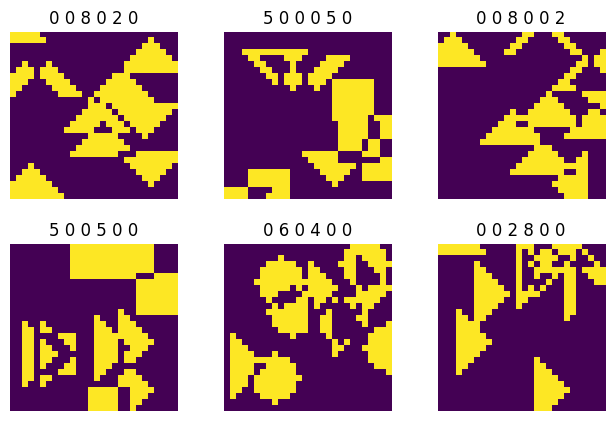

---

## 3. Tasks and objectives

You must design a **multitask deep learning system** that:

1. **Classifies** each image into one of **135 possible configurations**, representing:

   * which **two shape classes** appear, and
   * how their counts (1–9) sum to 10.

   → Example: "3 circles + 7 squares" is one configuration class.

2. **Regresses** the number of shapes of each type (a 6-dimensional real-valued output).

3. Combines both objectives in a **joint loss** function (Hint: losses are implemented in PyTorch):


$$ Loss = \text{NLLLoss(classification)} + \lambda_{\text{cnt}} \cdot \text{SmoothL1Loss(regression)}
$$

---

## 4. Model requirements

### Architecture constraints

You must use **exactly this feature extractor (backbone)**:

```python
nn.Sequential(
    nn.Conv2d(1, 8, 3, stride=1, padding=1), nn.ReLU(),
    nn.Conv2d(8, 16, 3, stride=1, padding=1), nn.ReLU(),
    nn.Conv2d(16, 32, 3, stride=1, padding=1), nn.ReLU(),
    nn.Conv2d(32, 64, 3, stride=1, padding=1), nn.ReLU(),
    nn.Flatten(start_dim=1),
    nn.Linear(64 * 28 * 28, 256), nn.ReLU()
)
```

Then add **two separate heads**:

* `head_cls`: outputs log-probabilities for 135 classes
* `head_cnt`: outputs 6 regression values (counts)

The model must return two outputs: `(log_probs, counts)`.

You may add dropout or batch normalization inside the heads, **but you must not modify the backbone**.

---

## 5. Training setup

* Optimizer: **Adam**, learning rate = 1e-3
* Epochs: up to **100** (use **early stopping**)
* Batch sizes: **64** (train), **1000** (validation)
* Device: GPU allowed for Notebook, but your **final code must run on GPU within ~30 minutes**
* Random seed: set `torch.manual_seed(1)` for reproducibility
* Split: **exactly 9,000 train / 1,000 validation**


---

## 6. Data preprocessing and augmentation

You must implement a **PyTorch `Dataset` class** that:

* Reads `labels.csv`
* Loads the corresponding image (from `data/`)
* Returns both:
  * the image (as a tensor)
  * the labels (counts for 6 shapes)
* Optionally applies transformations

### Required augmentations

You must implement **at least three** of the following:

1. Random horizontal flip
2. Random vertical flip
3. Random 90° rotation (must correctly rotate orientation labels: up → right → down → left)
4. Random brightness/contrast (mild)
5. Gaussian noise
6. Random erasing (small areas only)


---

## 7. Evaluation metrics

Implement and report the following metrics on the validation set:

### (a) **Classification (135-way)**

* Top-1 accuracy
* Macro F1-score
* Per-pair accuracy (aggregate by unordered shape pair, e.g. {circle, up})

### (b) **Regression (6-D counts)**

* RMSE per class and overall
* MAE per class and overall

Also plot:

* Training and validation losses
* Validation accuracy and RMSE over epochs

**Important**: This task is not about finding the best architecture; we expect at least 50% accuracy, but achieving results higher than that will not affect the grade for the assignment**.


---

## 8. Experiments and analysis

You must train and compare **three model settings**:

| Setting | Description                                      |
| :------ | :----------------------------------------------- |
| 1       | **Classification-only:** λ_cnt = 0               |
| 2       | **Regression-only:** classification loss ignored |
| 3       | **Multitask:** λ_cnt = with your choose          |

For each experiment:

* Train until early stopping
* Record loss, accuracy, RMSE, and runtime
* Compare results and explain how λ influences learning
* Discuss whether multitask learning improves the main tasks


---

## 9. Final deliverables

You must submit .zip project with:

1. **Code** (`.ipynb` or `.py`) that:

   * Downloads and extracts the dataset
   * Defines dataset, dataloaders, model, loss, training loop, evaluation, and plotting
   * Can run start-to-end without interaction, and finishes within 30 minutes on Colab T4 GPUs
   * Includes three experiment configurations

2. **Report (2–4 pages, PDF)** including:
   * Section on (EDA) Exploratory Data Analysis in your report: no more than 3 graphs or tables describing the data set.
   * Model architecture
   * Description and justification of augmentations
   * Results table (loss, accuracy, RMSE for all runs)
   * Learning curves
   * Discussion on multitask effects

3. **README.md**:

   * Link to Colab version of task for fast replication.
   * Approximate runtime and resource requirements

---

## 10. Grading rubric

Component	Description	Points
1. Implementation correctness	Correct use of the fixed backbone, two-headed model, and proper training loop (classification + regression).	30%
2. Data & augmentations	Proper dataset loading, preprocessing, and at least three augmentations with brief justification.	20%
3. Evaluation & experiments	Correct computation of metrics (accuracy, F1, RMSE) and completion of all three λ configurations (λ=0, regression-only, your choice λ).	30%
4. Report & analysis
A clear separation of concerns (e.g. headers in notebooks, modules in code) and concise 2–4 page report with results tables, learning curves, confusion matrix, and short discussion on multitask effects and error examples.
20%

###### Readability and modularity will be considered within each grading component. Clear structure (headers in notebooks, docstrings, modular code) significantly improves evaluation speed. Emphasize using clear headers to help reviewers navigate efficiently.
---

# **Project: Multitask Learning for Geometric Shape Classification and Counting**
---
### **Introduction**
This project focused on constructing a single **Multitask neural network** capable of both recognizing and counting shapes on 28x28 binary images. The main objective is to compare the performance and training progression of a **Multitask** approach against **Classification-only** and **Regression-only** models.

Runtime in this attempt: around 16 minutes

---
**Author:** Michał Słowakiewicz, 448827

## **1. Environment setup**
---
This section is responsible for downloading the dataset with 28x28 binary images, importing all the necessary libraries (PyTorch, Pandas, Numpy etc.) and seeting random seed for reproductability of the code.

In [ ]:
!wget  https://github.com/marcin119a/data/raw/refs/heads/main/data_gsn.zip
!unzip data_gsn.zip &> /dev/null
!rm data_gsn.zip

--2025-11-24 20:22:14--  https://github.com/marcin119a/data/raw/refs/heads/main/data_gsn.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/marcin119a/data/refs/heads/main/data_gsn.zip [following]
--2025-11-24 20:22:15--  https://raw.githubusercontent.com/marcin119a/data/refs/heads/main/data_gsn.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5544261 (5.3M) [application/zip]
Saving to: ‘data_gsn.zip’

data_gsn.zip        100%[===================>]   5.29M  --.-KB/s    in 0.01s   

2025-11-24 20:22:15 (424 MB/s) - ‘data_gsn.zip’ saved [5544261/5544261]



In [ ]:
# torch imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torch import Tensor
import torch.nn.functional as F

# the rest of imports
import pandas as pd
import numpy as np
import os
from PIL import Image
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
# setting seed
seed = 1
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)
if torch.cuda.is_available():
  torch.cuda.manual_seed(seed)

In [ ]:
# choosing device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
data_folder = "data"
csv_file_path = os.path.join(data_folder, "labels.csv")
batch_size = 64

## **2. Data preparation**
---
In this section there is an implementation of the *GeometricShapesDataset* class, which is fundamental for this project.

The neural network developed in this project had a huge potential for overfitting, therefore it was essential to introduce potential augumentations of dataset in this class. We implemented three following augumentations:
1. **Random horizontal flip**: flips image horizontally and switches Left/Right labels.
2. **Random vertical flip**: flips image vertically and switches Down/Up labels.
3. **Random gaussian noise**: adds gaussion noise (with mean equal to 0 and standard deviation equal to 0.1) to image.

Moreover, after implementation of this class, it was tested to see whether it returns desired outputs.


In [ ]:
# implementing Dataset class in PyTorch

class GeometricShapesDataset(Dataset):

  def __init__(self, csv_file_path, root_directory, mode = "train", transform = False):
    """
    Parameters:
      csv_file_path - path to file labels.csv containig labels for the dataset
      root_directory - path to folder containing images
      mode - parameter responsible for determining whether we use training mode (first 9000 images; = "train") or we use validation mode (last 1000 images; = "validation")
      transform (True or False) - parameter responsible for decision whether to use chosen augumentations
    """
    self.root_directory = root_directory
    self.transform = transform

    labels = pd.read_csv(csv_file_path)

    if mode == "train":
      self.labels_df = labels[:9000]
    elif mode == "validation":
      self.labels_df = labels[-1000:]
    else:
      raise ValueError("Parameter 'mode' should be equal to 'train' or 'validation'.")

  def __len__(self):
     return len(self.labels_df)

  def __getitem__(self, index):
    """
    Method introduced to get data from labels_df.
    """
    #row = self.labels_df[index] # resulted in error
    row = self.labels_df.iloc[index]

    # obtaining image
    image_name = row["name"]
    image_path = os.path.join(self.root_directory, image_name)
    image = Image.open(image_path).convert("L") # without ".convert("L")" the image wouldn't be converted to grayscale and the numbers of channels wouldn't match on training, resulting in an error

    # coverting row to pytorch tensor
    counts_tensor = torch.tensor(row[1:].values.astype(np.float32))

    ### Addressing the augumentations
    if self.transform == True:
      # only some random part of images will be chaneged
      # each augumentation will have 50% chances of being introduced for each image

      # horizontal flip augumentation
      if torch.rand(1) < 0.5:
        image = image.transpose(Image.FLIP_LEFT_RIGHT)

        # 'triangle left' and 'triangle right' labels require switching
        right_count = counts_tensor[3].item()
        left_count = counts_tensor[5].item()

        counts_tensor[3] = left_count
        counts_tensor[5] = right_count

      # vertical flip augumentation
      if torch.rand(1) < 0.5:
        image = image.transpose(Image.FLIP_TOP_BOTTOM)

        # 'triangle up' and 'triangle down' labels require switching
        up_count = counts_tensor[2].item()
        down_count = counts_tensor[4].item()

        counts_tensor[2] = down_count
        counts_tensor[4] = up_count

      # transforming image into tensor
      image = transforms.ToTensor()(image)

      # gaussian noise augumentation
      if torch.rand(1) < 0.5:
        gaussian_noise = torch.randn_like(image) * 0.1

        # adding noise to image
        image = image + gaussian_noise

        # clamping values to interval (0, 1)
        image = torch.clamp(image, 0, 1)

    else:
      # transforming image into tensor
      image = transforms.ToTensor()(image)

    # assigning counts tensor to correct class; to do it we use _map_counts_to_class_label method that is defined later
    class_label = self._map_counts_to_class_label(counts_tensor)

    return image, counts_tensor, class_label

  def _map_counts_to_class_label(self, counts_tensor):
    """
    Function responsible for mapping 'counts_tensor' to one of the 135 classification classes.
    """

    index_1 = (torch.where(counts_tensor > 0)[0][0]).item()
    index_2 = (torch.where(counts_tensor > 0)[0][1]).item()
    count_1 = counts_tensor[index_1].item()
    count_2 = counts_tensor[index_2].item()

    # defining the 135 classes

    # first introduce part responsible for encoding what 2 classes of shapes are taken
    pairs = sorted([(i, j) for i in range(6) for j in range(i+1, 6)]) # 15 distinct pairs
    current_pair = tuple(sorted((index_1, index_2)))
    pair_class = pairs.index(current_pair)

    # now we define the part responsible for encoding what is the distribution of count_1 and count_2
    # let us introduce mapping: (1, 9) -> class 0, (2, 8) -> class 1, ..., (9, 1) -> class 8; 9 classes in total
    # therefore we may use formula
    distribution_class = int(counts_tensor[current_pair[0]].item()) - 1

    # final label
    label = (pair_class * 9) + distribution_class # 15*9 = 135 distinct classes

    return torch.tensor(label, dtype = torch.int64)

In [ ]:
# Testing part for class GeometricShapesDataset(Dataset)

# Test 1
train_dataset = GeometricShapesDataset(csv_file_path=csv_file_path, root_directory=data_folder, mode="train")
validation_dataset = GeometricShapesDataset(csv_file_path=csv_file_path, root_directory=data_folder, mode="validation")

print("Test 1")
print(f"Size of training dataset: {len(train_dataset)}")
print(f"Size of training dataset: {len(validation_dataset)}")

# Test 2
train_dataset = GeometricShapesDataset(csv_file_path=csv_file_path, root_directory=data_folder, mode="train", transform = True)
validation_dataset = GeometricShapesDataset(csv_file_path=csv_file_path, root_directory=data_folder, mode="validation", transform = False)

print("Test 2")
print(f"Size of training dataset: {len(train_dataset)}")
print(f"Size of training dataset: {len(validation_dataset)}")


# Test 3
# create DataLoader
train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size = 1000, shuffle=False)


for images, counts, labels in train_dataloader:
    print("Test 3")
    # verfification of shapes and types of images, count, labels in one batch
    print(f"Image batch: shape={images.shape}, type={images.dtype}")
    print(f"Counts batch: shape={counts.shape}, type={counts.dtype}")
    print(f"Labels batch: shape={labels.shape}, type={labels.dtype}")

    print("Example")
    print(f"Counts: {counts[0]}")
    print(f"Label:  {labels[0]}")

    break

Test 1
Size of training dataset: 9000
Size of training dataset: 1000
Test 2
Size of training dataset: 9000
Size of training dataset: 1000
Test 3
Image batch: shape=torch.Size([64, 1, 28, 28]), type=torch.float32
Counts batch: shape=torch.Size([64, 6]), type=torch.float32
Labels batch: shape=torch.Size([64]), type=torch.int64
Example
Counts: tensor([0., 6., 0., 0., 4., 0.])
Label:  68


## **3. Explanatory Data Analysis**
---
Before training, explanatory data analysis was conducted in order to understand class distribution, learn about dataset and look for potential imbalances in dataset. We generated the plot representing distribution of shapes and classes  and vizualized what classes are missing in dataset.


Shapes counts: 
squares    14923
circles    15490
up         14811
right      15069
down       15226
left       14481
dtype: int64


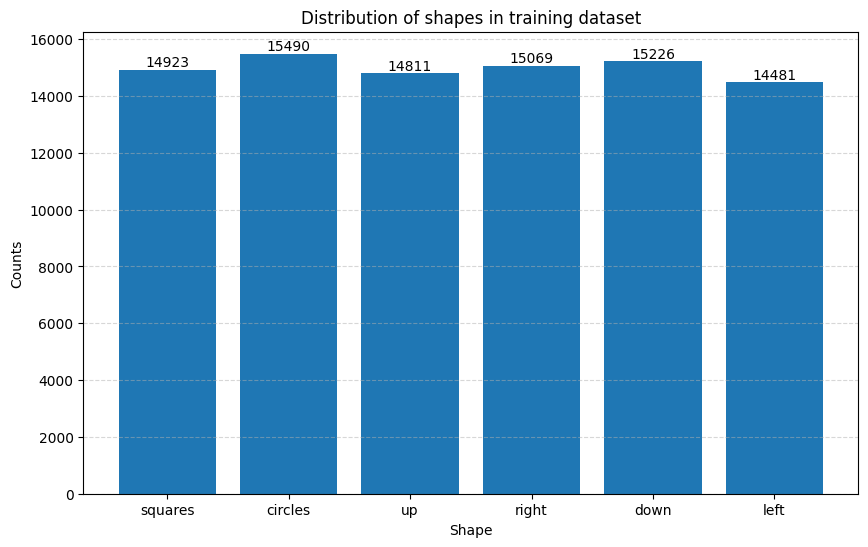

/tmp/ipython-input-906530298.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_train["class_135"] = labels_train.apply(map_row_to_class, axis = 1)


Metrics:
count    105.000000
mean      85.714286
std        8.627677
min       56.000000
25%       80.000000
50%       86.000000
75%       92.000000
max      105.000000
Name: count, dtype: float64
Most common classes:
class_135
88    105
59    104
92    101
97     99
23     98
Name: count, dtype: int64
Rarest classes:
class_135
24     70
48     69
103    68
10     65
37     56
Name: count, dtype: int64


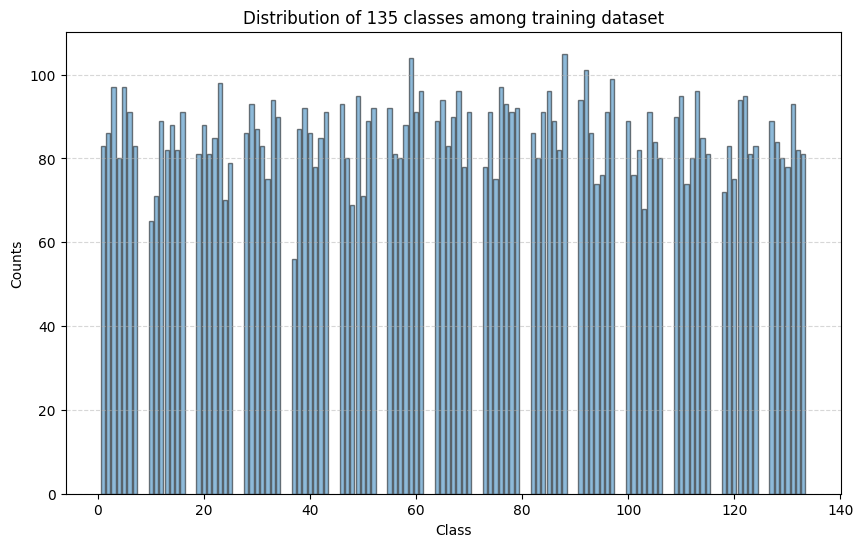

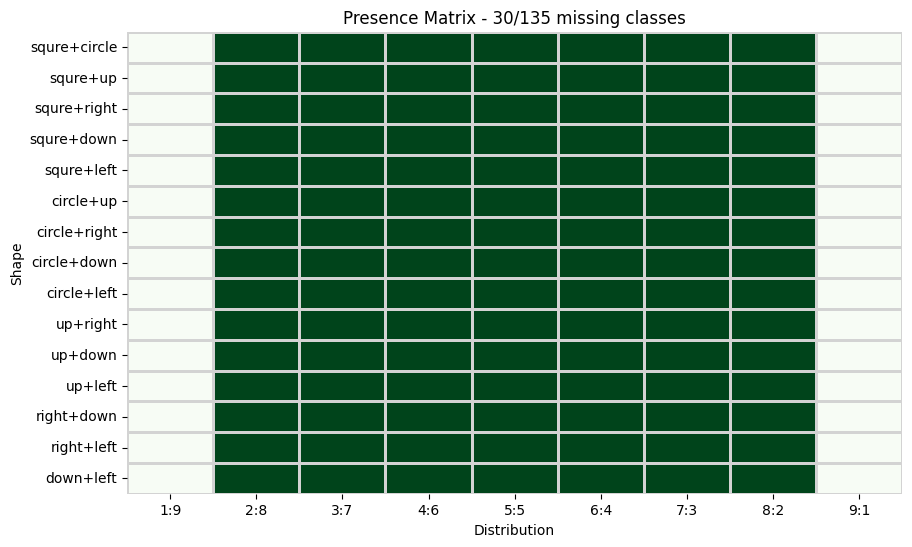

In [ ]:
# Explanatory Data Analysis
labels = pd.read_csv(csv_file_path)

# loading training part
labels_train = labels[:9000]

# counting shape types
shapes_columns = ["squares", "circles", "up", "right", "down", "left"]
shapes_df = labels_train[shapes_columns]
shapes_counts = shapes_df.sum()
print("Shapes counts: ")
print(shapes_counts)

# Plot 1 showing distribution of shapes
plt.figure(figsize=(10,6))
bars = plt.bar(shapes_counts.index, shapes_counts.values)
plt.bar_label(bars)
plt.title("Distribution of shapes in training dataset")
plt.xlabel("Shape")
plt.ylabel("Counts")
plt.grid(axis = "y", linestyle="--", alpha = 0.5)
plt.savefig("EDA_plot_1.jpg")
plt.show()

# mapping rows to one of the 135 classses (similiar logic to the one used to GeometricShapesDataset)
pairs = sorted([(i, j) for i in range(6) for j in range(i + 1, 6)])

def map_row_to_class(row):
    vector_counts = row[shapes_columns]
    index_1 = np.where(vector_counts > 0)[0][0]
    index_2 = np.where(vector_counts > 0)[0][1]

    current_pair = tuple(sorted((index_1, index_2)))
    pair_class = pairs.index(current_pair)

    count_for_first_index = vector_counts.iloc[current_pair[0]]
    distribution_class = int(count_for_first_index) - 1

    label = (pair_class * 9) + distribution_class
    return label

# creating new column representing one of 135 classes
labels_train["class_135"] = labels_train.apply(map_row_to_class, axis = 1)

# counting appearences of each class
class_counts = labels_train["class_135"].value_counts()

# print some information
print("Metrics:")
print(class_counts.describe())
print("Most common classes:")
print(class_counts.head(5))
print("Rarest classes:")
print(class_counts.tail(5))

# Plot 2 - distribution of classes
plt.figure(figsize=(10,6))
plt.bar(class_counts.index, class_counts.values,  edgecolor='black', alpha=0.5)
plt.title("Distribution of 135 classes among training dataset")
plt.xlabel("Class")
plt.ylabel("Counts")
plt.grid(axis = "y", linestyle="--", alpha = 0.5)
plt.savefig("EDA_plot_2.jpg")
plt.show()


# Presence matrix - showing exactly wihich classes are present in dataset
presence_matrix = np.zeros((15, 9))

# 1 if class is present within datset, 0 otherwise
present_classes = labels_train['class_135'].unique()
for class_id in present_classes:
  index_1 = class_id // 9
  index_2 = class_id % 9
  presence_matrix[index_1, index_2] = 1

# preparing labels
shape_names = ['squre', 'circle', 'up', 'right', 'down', 'left']
pair_labels = [f"{shape_names[p[0]]}+{shape_names[p[1]]}" for p in pairs]
number_labels = [f"{i+1}:{9-i}" for i in range(9)]

# Plot 3 - presence matrix
plt.figure(figsize=(10,6))
sns.heatmap(presence_matrix, annot=False, cmap="Greens", cbar=False, linecolor='lightgray', linewidths=1, xticklabels=number_labels, yticklabels=pair_labels)
nb_missing_classes = 135 - len(present_classes)
plt.title((f"Presence Matrix - {nb_missing_classes}/135 missing classes"))
plt.xlabel("Distribution")
plt.ylabel("Shape")
plt.savefig("EDA_plot_3.jpg")
plt.show()

## **4. Model Architecture**
---
In this section the model architecture was constructed. We used the required **backbone** and two heads for classification and regression tasks:
1. **Backbone:** a convolutional solution designed to extract information from 28x28 images with various shapes (4 convolutional layers, Flatten, 1 Linear layer).
2. **Classification Head:** head responsible for predicting affiliation to 135 classes (2 linear layers, Dropout)
3. **Regression Head:** head responsible for predicting counts values (2 linear layers).


Since the neural network had huge tendencies towards overfitting, Dropout was introduced in classification head to prevent that.

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()

    # backbone
    self.backbone = nn.Sequential(
      nn.Conv2d(1, 8, 3, stride=1, padding=1),
      nn.ReLU(),
      nn.Conv2d(8, 16, 3, stride=1, padding=1),
      nn.ReLU(),
      nn.Conv2d(16, 32, 3, stride=1, padding=1),
      nn.ReLU(),
      nn.Conv2d(32, 64, 3, stride=1, padding=1),
      nn.ReLU(),
      nn.Flatten(start_dim=1),
      nn.Linear(64 * 28 * 28, 256),
      nn.ReLU()
    )

    # head_cls and head_cnt

    # initial form of heads - it didn't perform well (maximum accuracy it achieved was about 25%)
    #self.head_cls = nn.Linear(256, 135)
    #self.head_cnt = nn.Linear(256, 6)

    # new form for heads - we try deeper approach with dropout to prevent overfitting
    self.head_cls = nn.Sequential(
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(128, 135)
    )

    self.head_cnt = nn.Sequential(
        nn.Linear(256, 32),
        nn.ReLU(),
        nn.Linear(32, 6)
    )

  def forward(self, x: Tensor) -> Tensor:
    x = self.backbone(x) # (batch_size, 256)
    logits_cls = self.head_cls(x)
    counts_cnt = self.head_cnt(x)
    log_probs_cls = F.log_softmax(logits_cls, dim=1)

    return log_probs_cls, counts_cnt

## **5. Traning Loop**
---
Here the function *run_training* was defined, which will be widely used during experimentation. The function has all necessary functionalities and handles:


* **Modes:** Multitask, Classification-only and Regression-only. Each of this modes operates using different loss function.
* **Metrics calculation:** Function keeps track of training loss, accuracy, F1-score, per-pair accuracy, RMSE and MAE. Function returns metrics history, enabling the user to analyze training progression.
* **Early stopping:** Parameters *patience* and *desired_accuracy* are responsible for defining early stopping conditions enabling finishing training before reaching maximum number of epochs.
* **Saving:** When the training is finished, functions saves model parameters to *.pth* file.

The function consists of training part, in which training is done, and validation part, where metrics are calculated.


In [ ]:
# To run final experiments, we define function, which will be responsible for training
def run_training(mode, lambda_cnt=1, n_epochs=100, lr=1e-3, patience=10, desired_accuracy=0.45):

  # inicializing model
  model = Model().to(device)
  optimizer = optim.Adam(model.parameters(), lr=lr)

  # parameters for early stopping mechanism
  epochs_without_improvement = 0
  best_validation_loss = float('inf')

  # defining loss functions
  loss_cls = nn.NLLLoss()
  loss_cnt = nn.SmoothL1Loss()

  # creating lists that will be responsible for storing data that will enable us to create plots about learnig curves and metrics
  history = {
    'avg_train_loss': [], 'total_train_loss': [],
    'avg_validation_loss': [], 'total_validation_loss': [],
    'validation_accuracy': [], 'validation_f1_score': [],
    'validation_per_pair_accuracy': [],
    'validation_rmse': [], 'validation_mae': [],
    'validation_rmse_per_class': [], 'validation_mae_per_class': []
  }

  # setting training mode
  model.train()

  # training loop
  for i in range(n_epochs):
    ### TRAINING SECTION ###
    total_train_loss = 0.0

    for batch_index, (images, counts, labels) in enumerate(train_dataloader):
      images, counts, labels = images.to(device), counts.to(device), labels.to(device)

      optimizer.zero_grad()
      output_cls, output_cnt = model(images)

      # setting the loss function depending on 'mode' parameter
      if mode == "multitask":
        loss = loss_cls(output_cls, labels) + lambda_cnt * loss_cnt(output_cnt, counts)
      elif mode == "classification":
        loss = loss_cls(output_cls, labels)
      elif mode == "regression":
        loss = loss_cnt(output_cnt, counts)
      else:
        raise ValueError("The parameter 'mode' should be equal to 'multitask', 'classification' or 'regression'.")

      loss.backward()
      optimizer.step()
      total_train_loss = total_train_loss + loss.item()

    avg_train_loss = total_train_loss / len(train_dataloader)
    print(f"Epoch {i+1}: Average training loss = {avg_train_loss}")

    # updating history train loss lists
    history['avg_train_loss'].append(avg_train_loss)
    history['total_train_loss'].append(total_train_loss)
    ### END OF TRAINING SECTION ###


    ### VALIDATION SECTION ###
    # switching to evaluation mode
    model.eval()

    # setting up for validation
    total_validation_loss = 0.0
    all_true_labels = []
    all_prediction_labels = []
    all_true_counts = []
    all_prediction_counts = []

    with torch.no_grad():
        for images, counts, labels in validation_dataloader:
          images, counts, labels = images.to(device), counts.to(device), labels.to(device)

          output_cls, output_cnt = model(images)
          # setting the loss function depending on 'mode' parameter
          if mode == "multitask":
            loss = loss_cls(output_cls, labels) + lambda_cnt * loss_cnt(output_cnt, counts)
          elif mode == "classification":
            loss = loss_cls(output_cls, labels)
          elif mode == "regression":
            loss = loss_cnt(output_cnt, counts)
          total_validation_loss = total_validation_loss + loss.item()


          # saving outputs to lists
          # added '.cpu()' to prevent error while working with numpy on gpu
          # saving for cnt part
          all_prediction_counts.append(output_cnt.cpu())
          all_true_counts.append(counts.cpu())

          # saving for cls part
          predicted_labels = output_cls.argmax(dim=1)
          all_prediction_labels.append(predicted_labels.cpu())
          all_true_labels.append(labels.cpu())

    avg_validation_loss = total_validation_loss / len(validation_dataloader)

    # combing results saved in the lists
    validation_prediction_labels = torch.cat(all_prediction_labels) # tensor (1000) with all prediction labels
    validation_true_labels = torch.cat(all_true_labels)
    validation_prediction_counts = torch.cat(all_prediction_counts) # tensor (1000, 6) with all prediction counts
    validation_true_counts = torch.cat(all_true_counts)
    # these tensors will be used to calculate metrics

    # converting tensors to numpy format
    validation_prediction_labels_np = validation_prediction_labels.numpy()
    validation_true_labels_np = validation_true_labels.numpy()
    validation_prediction_counts_np = validation_prediction_counts.numpy()
    validation_true_counts_np = validation_true_counts.numpy()


    # a) calcuating metrics for classification part
    # calculating top1 accuracy
    validation_accuracy = accuracy_score(validation_true_labels_np, validation_prediction_labels_np)

    # calculating f1 score
    # introduced average = "macro", since otherwise it would result in error, because we are in multiclass environment
    validation_f1 = f1_score(validation_true_labels_np, validation_prediction_labels_np, average = 'macro', zero_division=0)

    # calculating 'per-pair accuracy'
    # it will be a bit more complicated than calculating f1 and accuracy
    # we can extract 'pair group' by dividing by 9
    true_pair_group = validation_true_labels_np // 9
    prediction_pair_group = validation_prediction_labels_np // 9

    # count cases when true_pair_group is equal to prediction_pair_group
    correct_pairs = (true_pair_group == prediction_pair_group)

    # compute 'per-pair accuracy'
    validation_per_pair_accuracy = correct_pairs.mean()

    print(f"Validation average training loss: {avg_validation_loss}")
    print(f"Validation metircs: top-1 accuracy = {validation_accuracy}, f1 score = {validation_f1}, per-pair accuracy = {validation_per_pair_accuracy}")

    # b) calculating metrics for regression part
    # RMSE
    mse_loss = nn.MSELoss()
    validation_rmse = torch.sqrt(torch.tensor(mse_loss(validation_true_counts, validation_prediction_counts).item())).item()

    # MAE
    mae_loss = nn.L1Loss()
    validation_mae = mae_loss(validation_true_counts, validation_prediction_counts).item()

    # now we have to compute RMSE and MAE per class
    squared_errors = (validation_prediction_counts - validation_true_counts) ** 2 # (1000, 6)
    absolute_errors = torch.abs(validation_prediction_counts - validation_true_counts) # (1000, 6)

    # we take mean over dim = 0
    mean_squared_errors = torch.mean(squared_errors, dim = 0) # (6)
    mean_absolute_errors = torch.mean(absolute_errors, dim = 0) # (6)

    validation_rmse_per_class = torch.sqrt(mean_squared_errors)
    validation_mae_per_class = mean_absolute_errors

    print(f"Validation metircs: RMSE (overall) = {validation_rmse}, MAE (overall) = {validation_mae}")
    print(f"Validation metircs: RMSE (per class) = {validation_rmse_per_class}, MAE (per class) = {validation_mae_per_class}")

    # updating history validation lists
    history['avg_validation_loss'].append(avg_validation_loss)
    history['total_validation_loss'].append(total_validation_loss)
    history['validation_accuracy'].append(validation_accuracy)
    history['validation_f1_score'].append(validation_f1)
    history['validation_per_pair_accuracy'].append(validation_per_pair_accuracy)
    history['validation_rmse'].append(validation_rmse)
    history['validation_mae'].append(validation_mae)
    history['validation_rmse_per_class'].append(validation_rmse_per_class)
    history['validation_mae_per_class'].append(validation_mae_per_class)
    ### END OF VALIDATION SECTION ###

    # path for saving the model
    save_path = f"model_{mode}.pth"

    # EARLY STOPPING mechanism
    # the mechanism works as follows: we assume that we may wait no more that 'patience' epochs (in our case 'patience'=10) for improvement of avg_validation_loss
    # if for 'patience' epochs we observe no improvement for this metric, then we stop training
    # what is more, we also stop training after achieving 'desired_accuracy' (in our case 'desired_accuracy'=0.45) or higher for accuracy on validation dataset
    if validation_accuracy >= desired_accuracy:
      # executing early stopping and saving the model
      torch.save(model.state_dict(), save_path)
      break

    # patience mechanism
    if avg_validation_loss < best_validation_loss:
      best_validation_loss = avg_validation_loss
      epochs_without_improvement = 0
    else:
      epochs_without_improvement += 1
    # checking if we have already run out of patience
    if epochs_without_improvement >= patience:
      # executing early stopping and saving the model
      torch.save(model.state_dict(), save_path)
      break

    # switching back to training mode
    model.train()

  # saving the model
  torch.save(model.state_dict(), save_path)

  return history

## **6. Experiments**
---
After implementing all mandatory code in previous section, we may finally focus on main experimentations. We compare three training strategies:
1. **Experiment 1:** Multitask approach with $\lambda = 2$
2. **Experiment 2:** Classification-only
3. **Experiment 3:** Regression-only

Before running the training, we load training and validation datasets using *GeometricShapeDataset* class

In [ ]:
# loading train dataset with augumentations, validation dataset without augumentations
train_dataset = GeometricShapesDataset(csv_file_path=csv_file_path, root_directory=data_folder, mode="train", transform=True)
validation_dataset = GeometricShapesDataset(csv_file_path=csv_file_path, root_directory=data_folder, mode="validation", transform=False)

train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size = 1000, shuffle=False)

In [ ]:
test_histories = {}

# Experiment 1
test_histories["multitask"] = run_training(mode="multitask", lambda_cnt=2, n_epochs=100)

Epoch 1: Average training loss = 7.563248319828764
Validation average training loss: 7.063686847686768
Validation metircs: top-1 accuracy = 0.013, f1 score = 0.00215542064726318, per-pair accuracy = 0.111
Validation metircs: RMSE (overall) = 2.5599803924560547, MAE (overall) = 1.6883955001831055
Validation metircs: RMSE (per class) = tensor([2.7002, 2.7668, 2.8733, 2.6583, 1.6801, 2.4959]), MAE (per class) = tensor([1.7277, 1.8478, 1.8945, 1.7372, 1.1561, 1.7671])
Epoch 2: Average training loss = 6.637978513190087
Validation average training loss: 6.103206634521484
Validation metircs: top-1 accuracy = 0.053, f1 score = 0.016612261372504575, per-pair accuracy = 0.222
Validation metircs: RMSE (overall) = 2.3559510707855225, MAE (overall) = 1.4878968000411987
Validation metircs: RMSE (per class) = tensor([2.0244, 2.7526, 2.9287, 2.5348, 1.2939, 2.2252]), MAE (per class) = tensor([1.3467, 1.8122, 1.8243, 1.6679, 0.7704, 1.5058])
Epoch 3: Average training loss = 5.445885566954917
Validation

In [ ]:
# Experiment 2
test_histories["classification"] = run_training(mode="classification", n_epochs=100)

Epoch 1: Average training loss = 4.7691714408549855
Validation average training loss: 4.680874824523926
Validation metircs: top-1 accuracy = 0.01, f1 score = 0.0001885902876001886, per-pair accuracy = 0.067
Validation metircs: RMSE (overall) = 3.025153160095215, MAE (overall) = 1.7503318786621094
Validation metircs: RMSE (per class) = tensor([3.1644, 2.9413, 3.0560, 3.0195, 2.9604, 3.0041]), MAE (per class) = tensor([1.7746, 1.7634, 1.7852, 1.8157, 1.7033, 1.6597])
Epoch 2: Average training loss = 4.619315461909517
Validation average training loss: 4.207014560699463
Validation metircs: top-1 accuracy = 0.033, f1 score = 0.006982531370302136, per-pair accuracy = 0.173
Validation metircs: RMSE (overall) = 3.0122830867767334, MAE (overall) = 1.7440335750579834
Validation metircs: RMSE (per class) = tensor([3.0244, 2.8846, 3.1498, 2.9638, 3.0296, 3.0152]), MAE (per class) = tensor([1.6973, 1.8008, 1.7437, 1.8525, 1.6788, 1.6910])
Epoch 3: Average training loss = 4.128978225356298
Validatio

In [ ]:
# Experiment 3
test_histories["regression"] = run_training(mode="regression", n_epochs=100)

Epoch 1: Average training loss = 1.4084354596780546
Validation average training loss: 1.3819553852081299
Validation metircs: top-1 accuracy = 0.009, f1 score = 0.0001698994761432819, per-pair accuracy = 0.065
Validation metircs: RMSE (overall) = 2.7360432147979736, MAE (overall) = 1.779695987701416
Validation metircs: RMSE (per class) = tensor([2.8895, 2.8516, 2.6512, 2.8941, 2.3075, 2.7758]), MAE (per class) = tensor([1.7184, 1.7052, 1.9291, 1.8222, 1.7424, 1.7608])
Epoch 2: Average training loss = 1.0756936195894335
Validation average training loss: 0.7975510954856873
Validation metircs: top-1 accuracy = 0.009, f1 score = 0.00021402582578297782, per-pair accuracy = 0.077
Validation metircs: RMSE (overall) = 1.818143367767334, MAE (overall) = 1.1428481340408325
Validation metircs: RMSE (per class) = tensor([1.4423, 2.2809, 1.5508, 1.1338, 1.1230, 2.7567]), MAE (per class) = tensor([0.9388, 1.4749, 1.2830, 0.7757, 0.7268, 1.6580])
Epoch 3: Average training loss = 0.5528698360666315
Val

## **7. Plot section**
---
This section consists of functions, which will be used for vizualziation and analysis purposes:
1.  ***plot_results:*** creates plots for single model, which will vizualize the dynamics of metrics during training.
2.  ***plot_comparison:*** shows comparison of metrics throughout training for three models developed in pevious section.
3. ***plot_confusion_matrix:*** generatesconfusion matrix dor certain model.



In [ ]:
# plots function for generating plots for single model

def plot_results(history, mode):
  total_epochs = len(history['avg_train_loss'])
  x_axis = range(1, total_epochs + 1)

  # Plot 1 (Average training and validation loss)
  plt.figure(figsize = (10, 6))
  plt.plot(x_axis, history['avg_train_loss'], label = "Average training loss")
  plt.plot(x_axis, history['avg_validation_loss'], label = "Average validation loss")
  plt.title(f"Average training loss vs. Average validation loss: {mode}")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()
  plt.grid(True)
  plt.show()

  # Plot 2 (Total training loss)
  plt.figure(figsize = (10, 6))
  plt.plot(x_axis, history['total_train_loss'], label = "Total training loss")
  plt.title(f"Total training loss: {mode}")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()
  plt.grid(True)
  plt.show()

  # Plot 3 (Total validation loss)
  plt.figure(figsize = (10, 6))
  plt.plot(x_axis, history['total_validation_loss'], color = "tab:orange", label = "Total validation loss")
  plt.title(f"Total validation loss: {mode}")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()
  plt.grid(True)
  plt.show()

  # Plot 4 (Validation accuracy)
  plt.figure(figsize = (10, 6))
  plt.plot(x_axis, history['validation_accuracy'], color = "tab:orange", label = "Validation accuracy")
  plt.title(f"Validation accuracy: {mode}")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.grid(True)
  plt.show()

  # Plot 5 (Validation f1 score)
  plt.figure(figsize = (10, 6))
  plt.plot(x_axis, history['validation_f1_score'], color = "tab:orange", label = "Validation F1-score")
  plt.title(f"Validation F1-score: {mode}")
  plt.xlabel("Epoch")
  plt.ylabel("F1-score")
  plt.legend()
  plt.grid(True)
  plt.show()

  # Plot 6 (Validation per-pair accuracy)
  plt.figure(figsize = (10, 6))
  plt.plot(x_axis, history['validation_per_pair_accuracy'], color = "tab:orange", label = "Validation per-pair accuracy")
  plt.title(f"Validation per-pair accuracy: {mode}")
  plt.xlabel("Epoch")
  plt.ylabel("Per-pair accuracy")
  plt.legend()
  plt.grid(True)
  plt.show()

  # Plot 7 (Validation RMSE)
  plt.figure(figsize = (10, 6))
  plt.plot(x_axis, history['validation_rmse'], color = "tab:orange", label = "Validation RMSE")
  plt.title(f"Validation RMSE: {mode}")
  plt.xlabel("Epoch")
  plt.ylabel("RMSE")
  plt.legend()
  plt.grid(True)
  plt.show()

  # Plot 8 (Validation MAE)
  plt.figure(figsize = (10, 6))
  plt.plot(x_axis, history['validation_mae'], color = "tab:orange", label = "Validation MAE")
  plt.title(f"Validation MAE: {mode}")
  plt.xlabel("Epoch")
  plt.ylabel("MAE")
  plt.legend()
  plt.grid(True)
  plt.show()

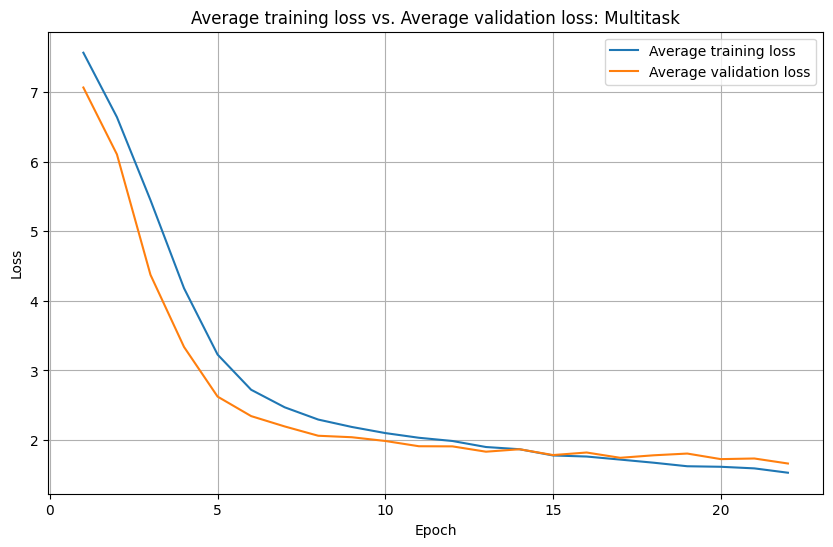

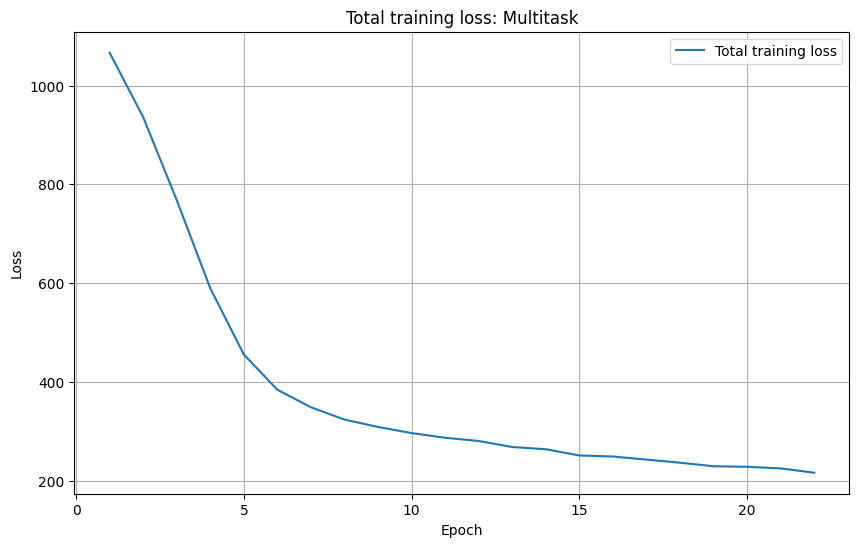

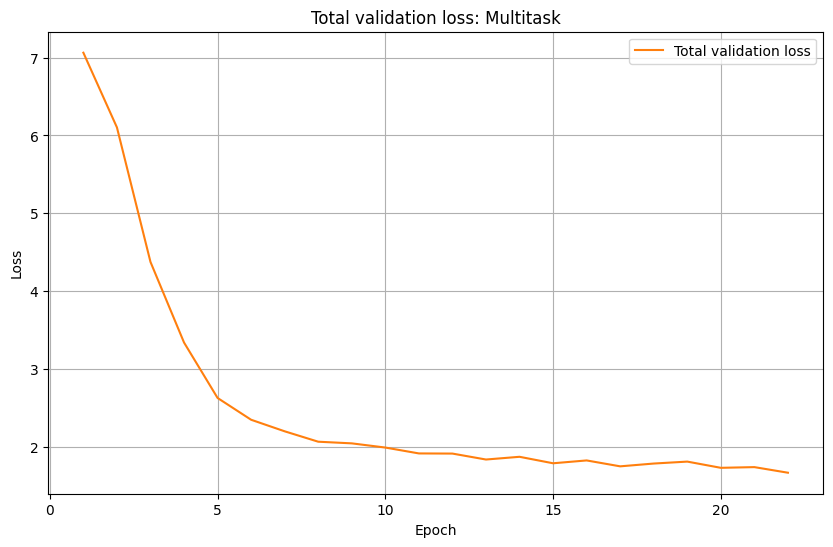

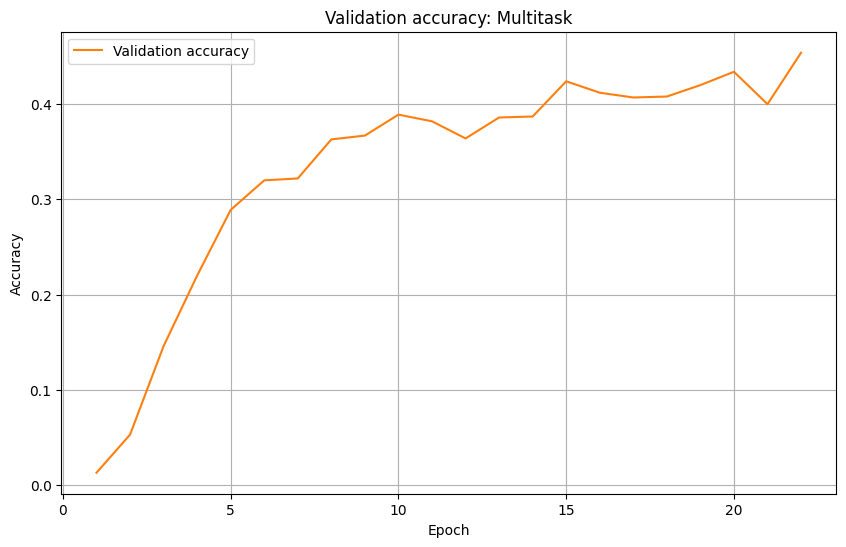

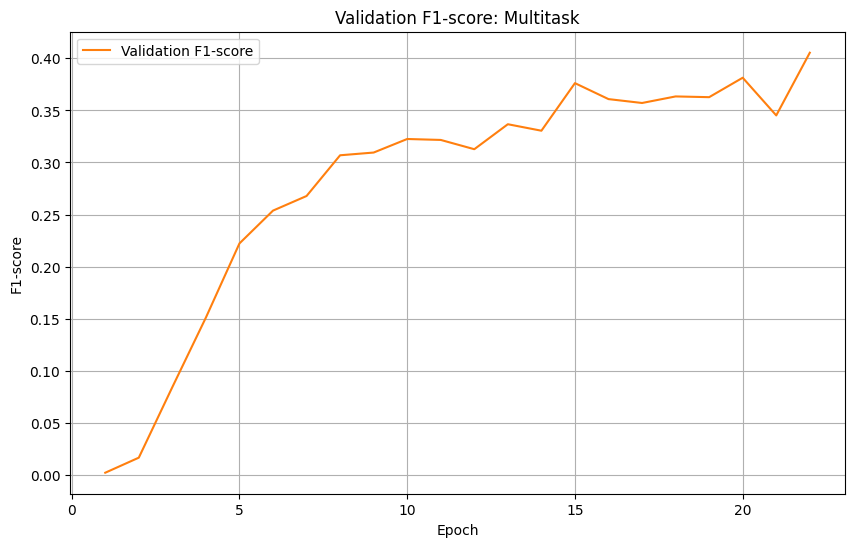

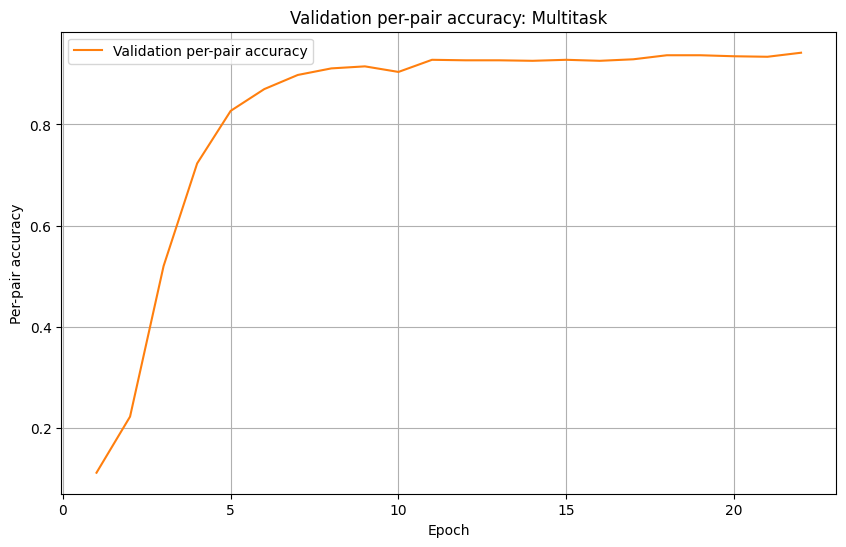

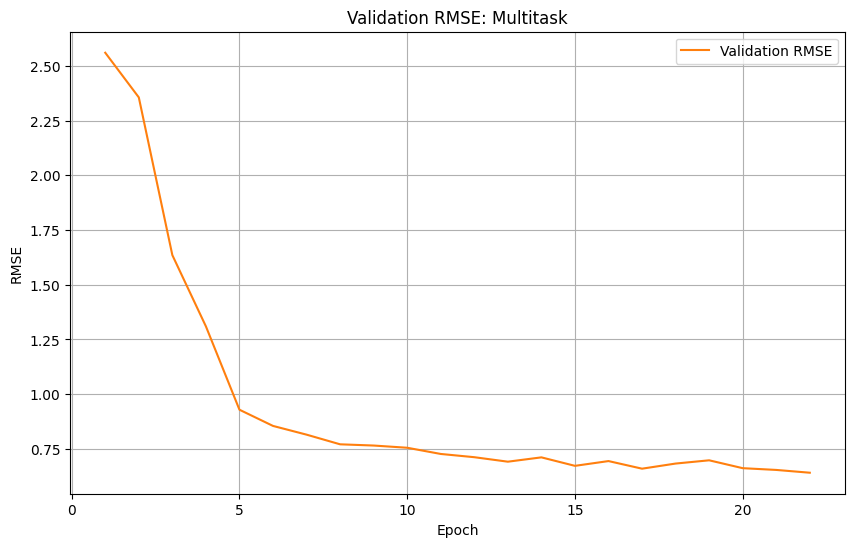

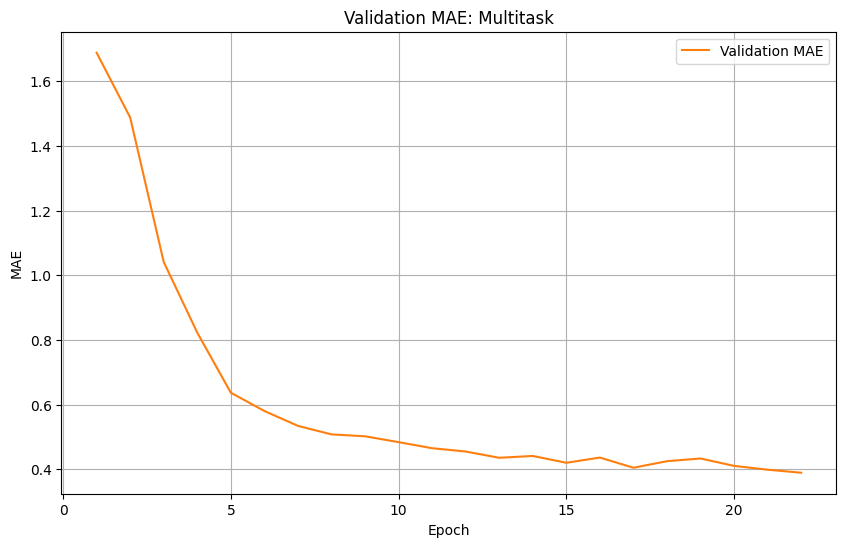

In [ ]:
plot_results(test_histories['multitask'], mode="Multitask")

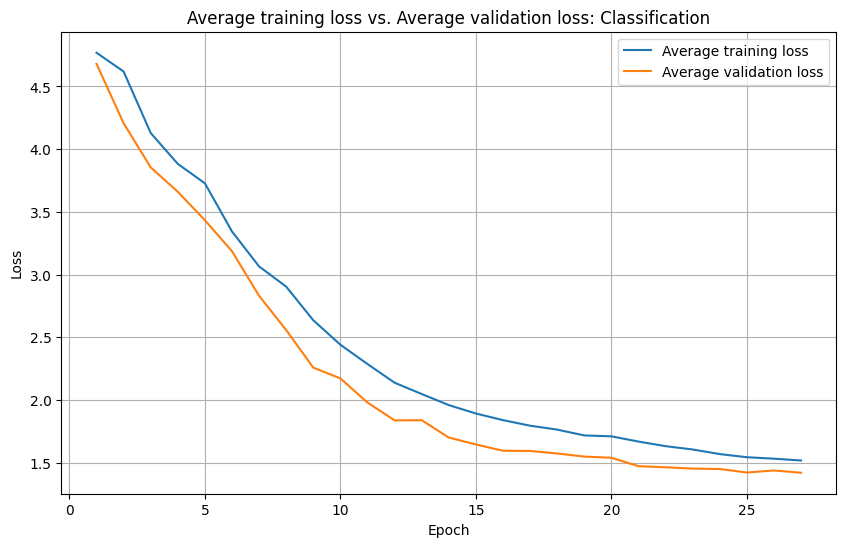

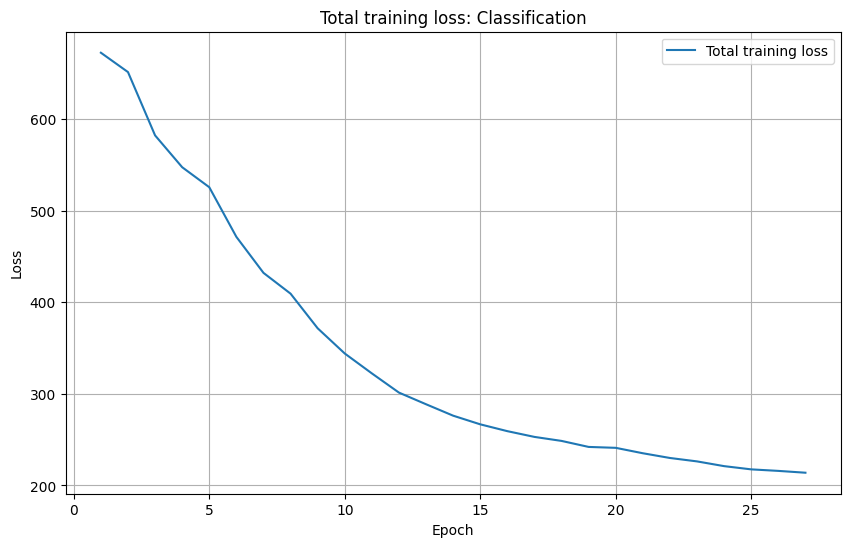

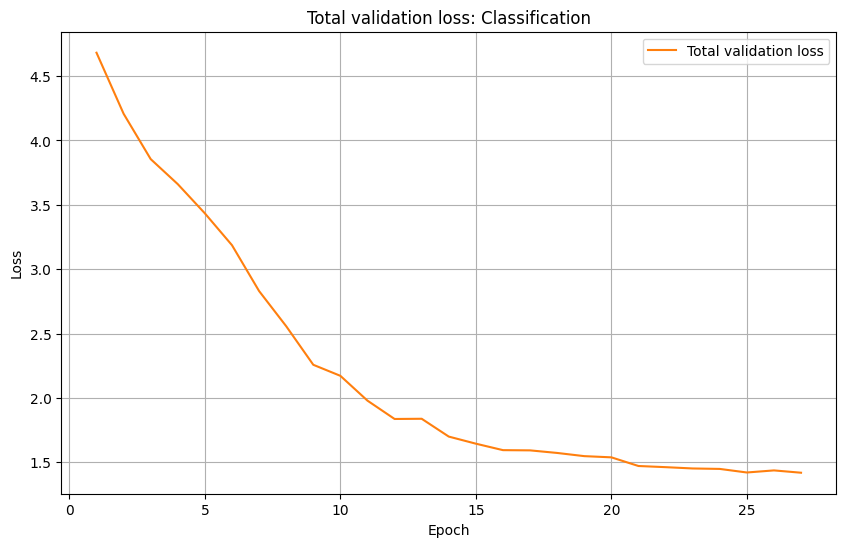

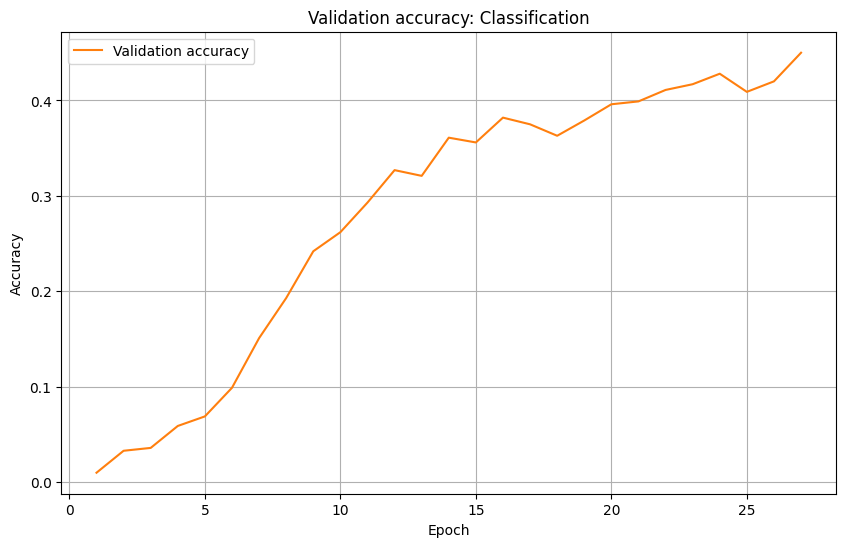

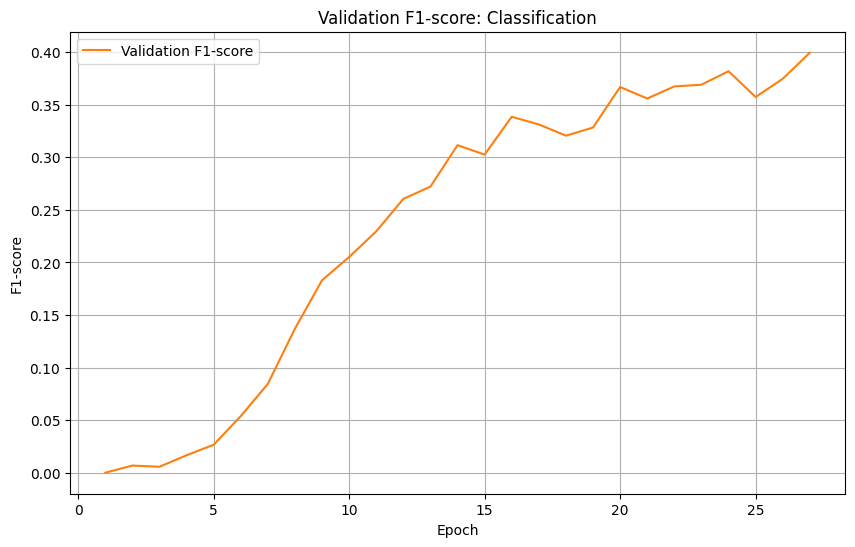

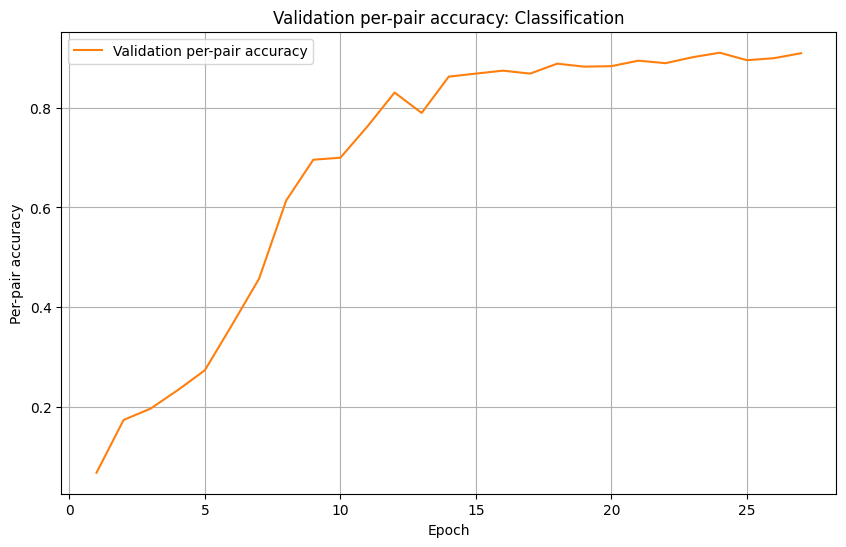

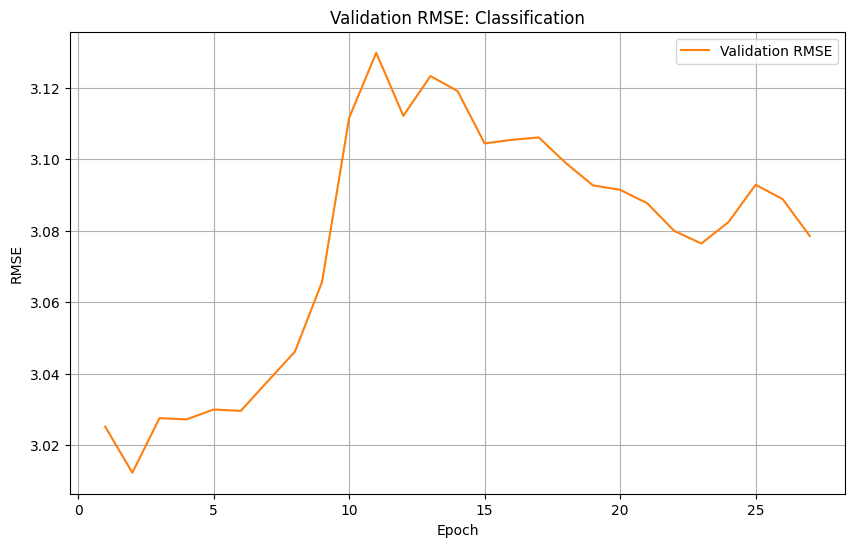

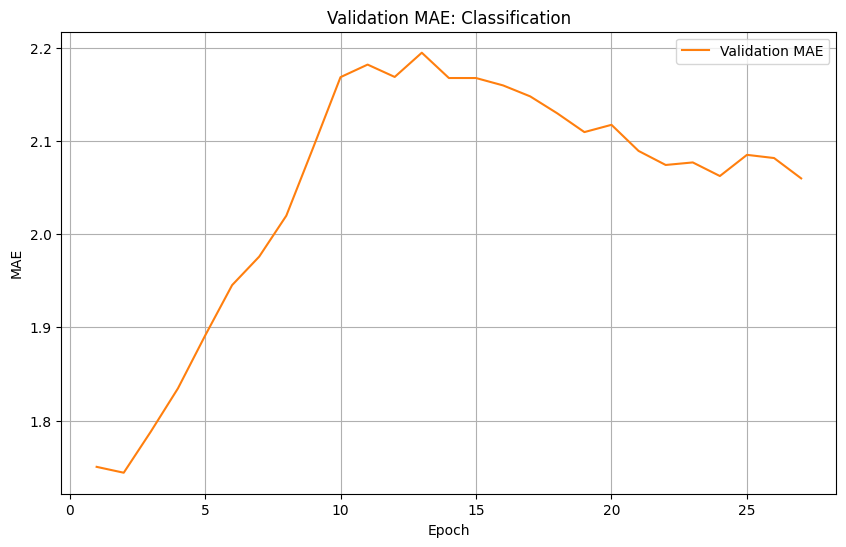

In [ ]:
plot_results(test_histories['classification'], mode="Classification")

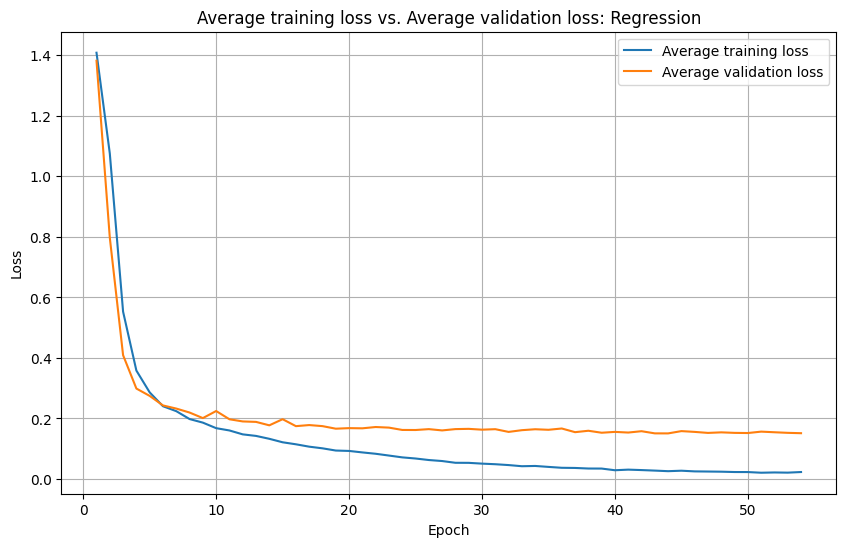

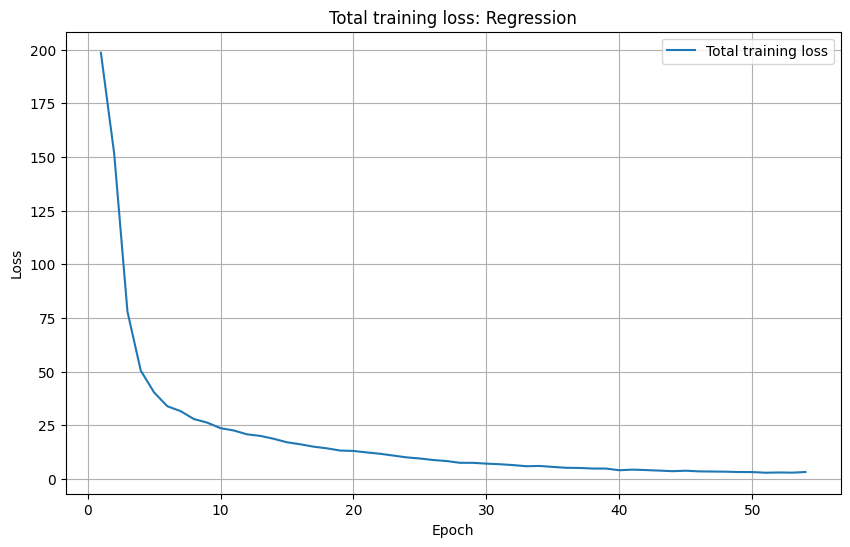

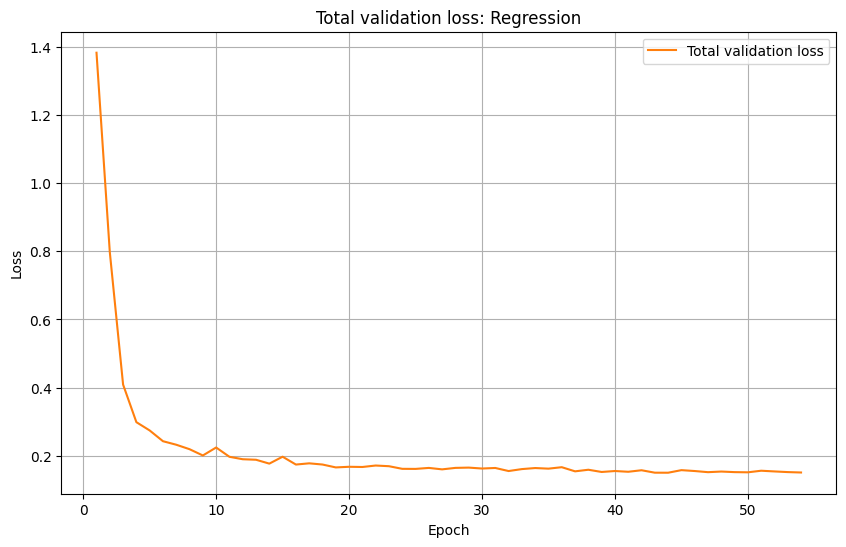

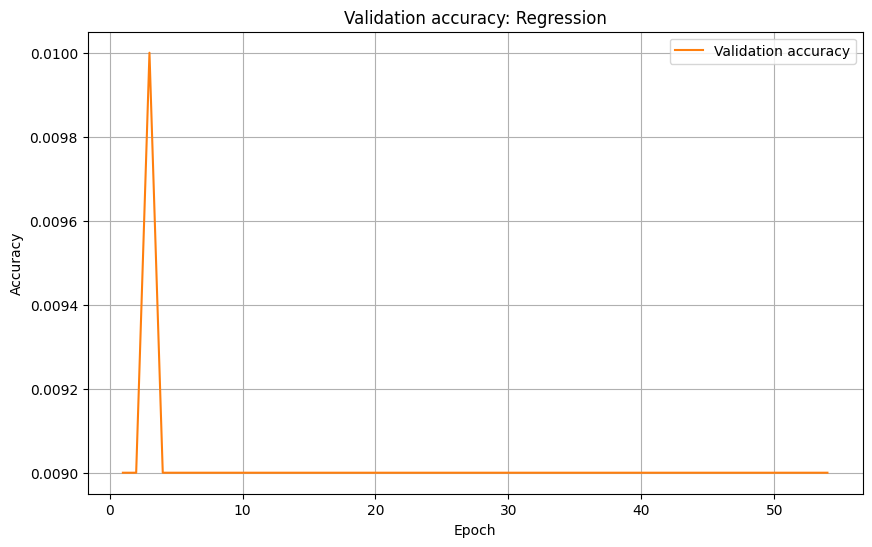

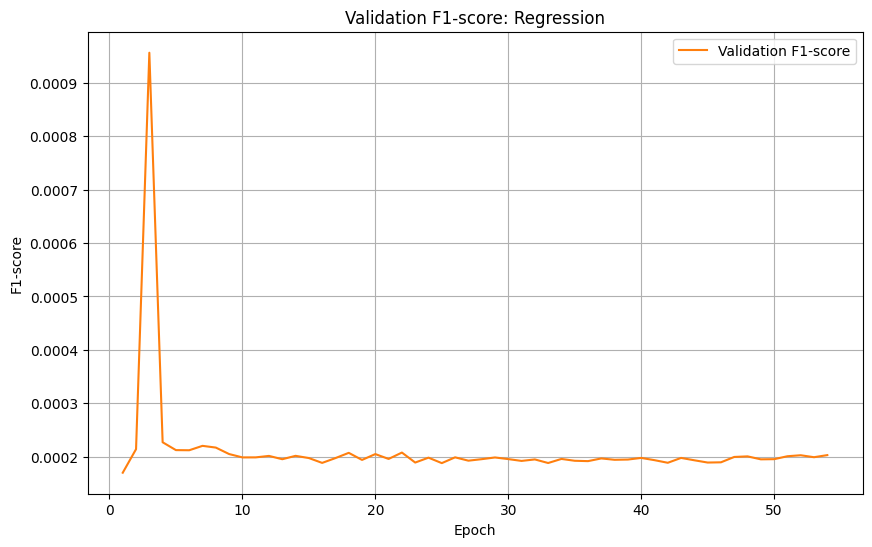

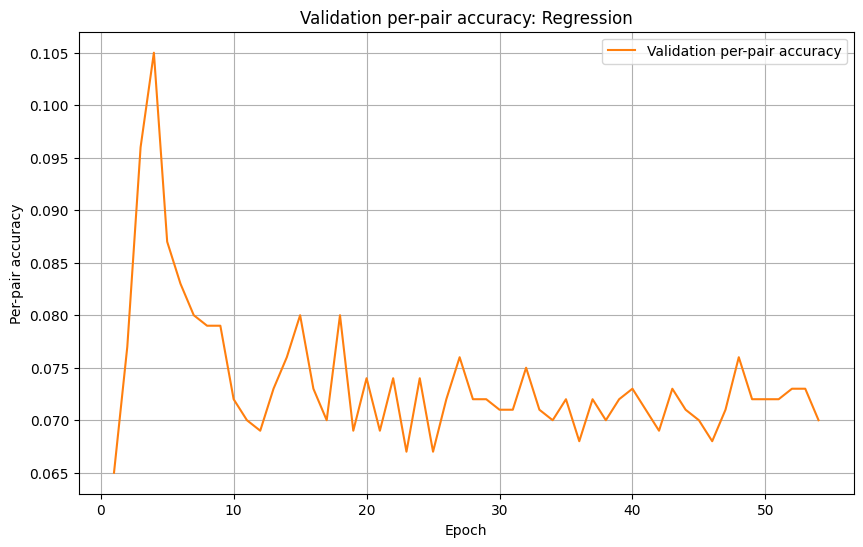

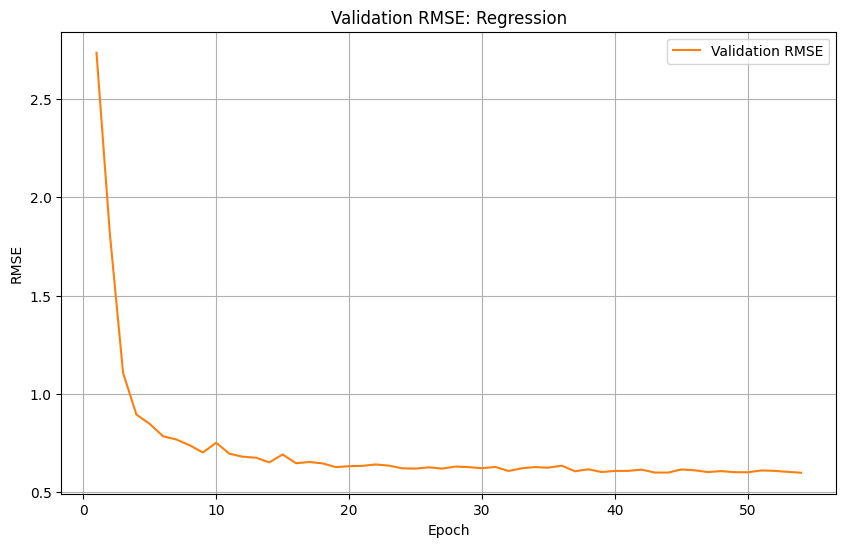

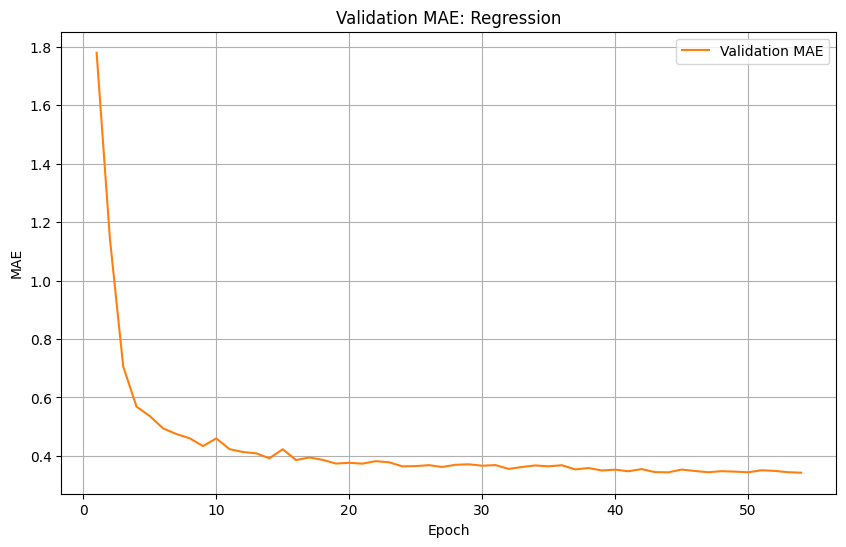

In [ ]:
plot_results(test_histories['regression'], mode="Regression")

In [ ]:
# plots function for generating comparison plots for different models

def plot_comparison(histories):
    x_axis_multitask = range(1, len(histories['multitask']['avg_train_loss']) + 1)
    x_axis_classification = range(1, len(histories['classification']['avg_train_loss']) + 1)
    x_axis_regression = range(1, len(histories['regression']['avg_train_loss']) + 1)

    # Plot 1 (Accuracy)
    accuracy_multitask = histories['multitask']['validation_accuracy']
    accuracy_classification = histories['classification']['validation_accuracy']
    accuracy_regression = histories['regression']['validation_accuracy']

    plt.figure(figsize = (10, 6))
    plt.plot(x_axis_multitask, accuracy_multitask, label = f"Multitask (Max = {max(accuracy_multitask):.2%})")
    plt.plot(x_axis_classification, accuracy_classification, label = f"Classification (Max = {max(accuracy_classification):.2%})")
    plt.plot(x_axis_regression, accuracy_regression, label = f"Regression (Max = {max(accuracy_regression):.2%})")
    plt.title("Model comparison: Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot 2 (f1-score)
    f1_multitask = histories['multitask']['validation_f1_score']
    f1_classification = histories['classification']['validation_f1_score']
    f1_regression = histories['regression']['validation_f1_score']

    plt.figure(figsize = (10, 6))
    plt.plot(x_axis_multitask, f1_multitask, label = f"Multitask (Max = {max(f1_multitask):.2%})")
    plt.plot(x_axis_classification, f1_classification, label = f"Classification (Max = {max(f1_classification):.2%})")
    plt.plot(x_axis_regression, f1_regression, label = f"Regression (Max = {max(f1_regression):.2%})")
    plt.title("Model comparison: F1-score")
    plt.xlabel("Epoch")
    plt.ylabel("F1-score")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot 3 (per-pair accuracy)
    per_pair_accuracy_multitask = histories['multitask']['validation_per_pair_accuracy']
    per_pair_accuracy_classification = histories['classification']['validation_per_pair_accuracy']
    per_pair_accuracy_regression = histories['regression']['validation_per_pair_accuracy']

    plt.figure(figsize = (10, 6))
    plt.plot(x_axis_multitask, per_pair_accuracy_multitask, label = f"Multitask (Max = {max(per_pair_accuracy_multitask):.2%})")
    plt.plot(x_axis_classification, per_pair_accuracy_classification, label = f"Classification (Max = {max(per_pair_accuracy_classification):.2%})")
    plt.plot(x_axis_regression, per_pair_accuracy_regression, label = f"Regression (Max = {max(per_pair_accuracy_regression):.2%})")
    plt.title("Model comparison: per-pair accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Per-pair accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot 4 (RMSE)
    rmse_multitask = histories['multitask']['validation_rmse']
    rmse_classification = histories['classification']['validation_rmse']
    rmse_regression = histories['regression']['validation_rmse']

    plt.figure(figsize = (10, 6))
    plt.plot(x_axis_multitask, rmse_multitask, label = f"Multitask (Min = {min(rmse_multitask):.2%})")
    plt.plot(x_axis_classification, rmse_classification, label = f"Classification (Min = {min(rmse_classification):.2%})")
    plt.plot(x_axis_regression, rmse_regression, label = f"Regression (Min = {min(rmse_regression):.2%})")
    plt.title("Model comparison: RMSE")
    plt.xlabel("Epoch")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot 5 (MAE)
    mae_multitask = histories['multitask']['validation_mae']
    mae_classification = histories['classification']['validation_mae']
    mae_regression = histories['regression']['validation_mae']

    plt.figure(figsize = (10, 6))
    plt.plot(x_axis_multitask, mae_multitask, label = f"Multitask (Min = {min(mae_multitask):.2%})")
    plt.plot(x_axis_classification, mae_classification, label = f"Classification (Min = {min(mae_classification):.2%})")
    plt.plot(x_axis_regression, mae_regression, label = f"Regression (Min = {min(mae_regression):.2%})")
    plt.title("Model comparison: MAE")
    plt.xlabel("Epoch")
    plt.ylabel("MAE")
    plt.legend()
    plt.grid(True)
    plt.show()

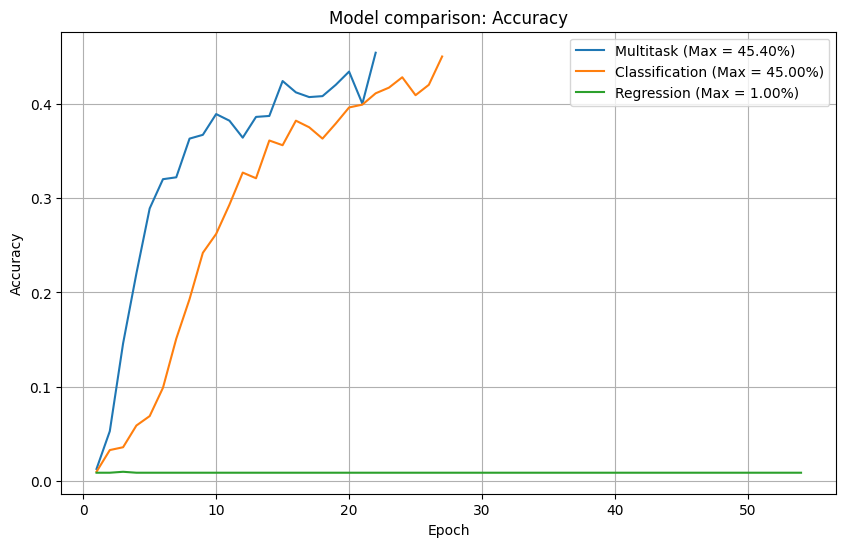

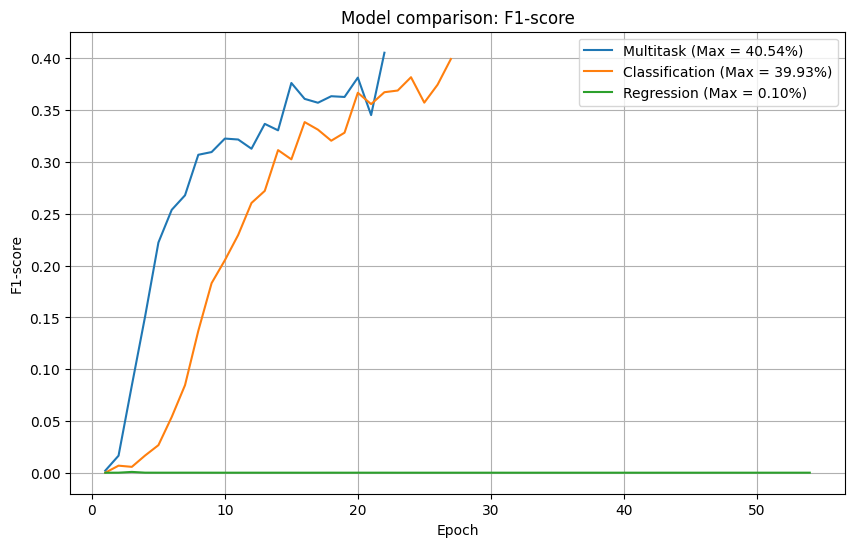

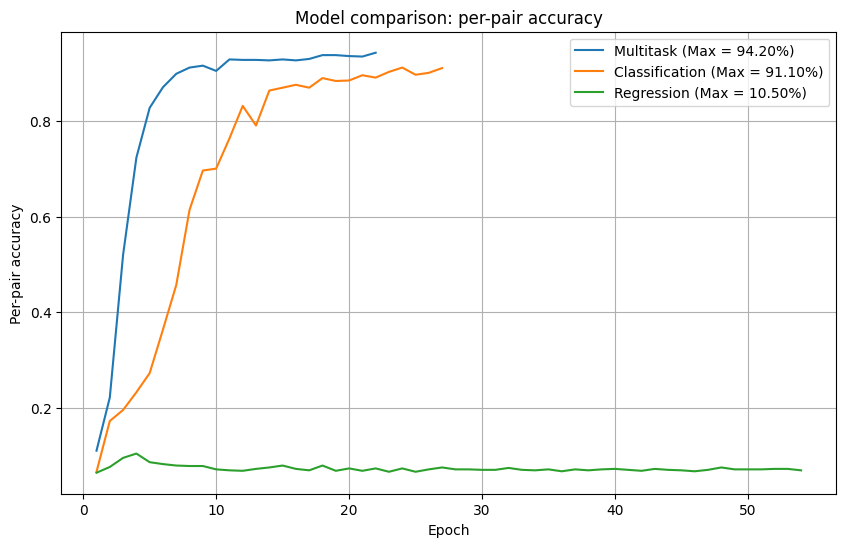

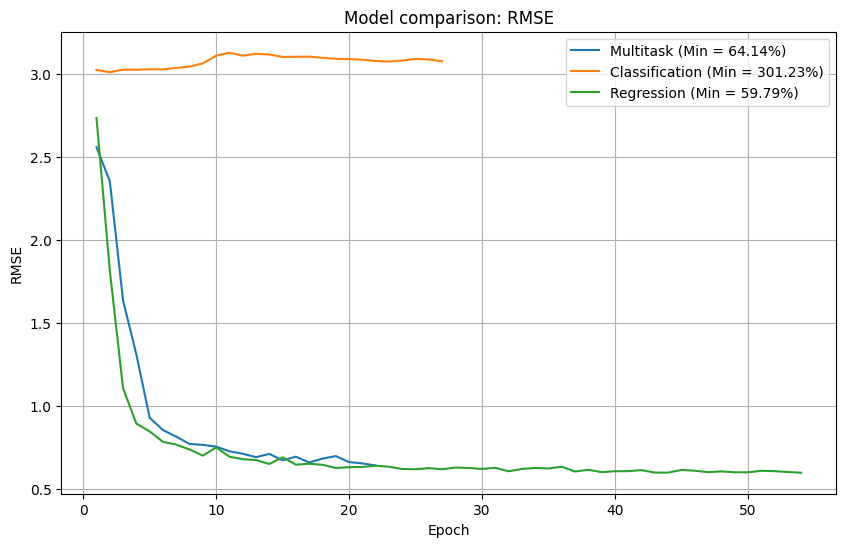

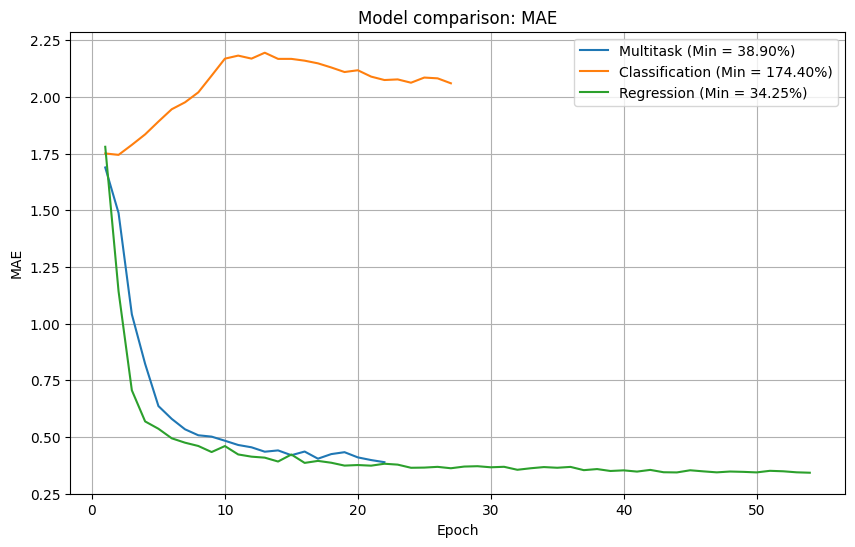

In [ ]:
plot_comparison(test_histories)

In [ ]:
# function for constructing confusion matrix

def plot_confusion_matrix(model, loader, device, mode):

    # setting evaluation mode
    model.eval()

    all_prediction_labels = []
    all_true_labels = []

    with torch.no_grad():
        for images, counts, labels in loader:
            images = images.to(device)
            labels = labels.to(device)

            output_cls, output_cnt = model(images)
            prediction_labels = output_cls.argmax(dim=1)

            all_prediction_labels.extend(prediction_labels.cpu().numpy())
            all_true_labels.extend(labels.cpu().numpy())

    # computing confusion matrix
    cm = confusion_matrix(all_true_labels, all_prediction_labels, labels=list(range(135)))

    # plotting heatmap
    plt.figure(figsize=(16, 9))
    sns.heatmap(cm, annot=False, cmap='viridis', xticklabels=False, yticklabels=False)

    # adding helper lines dividing 15 shapes configurations
    for i in range(0, 136, 9):
      plt.axhline(i, color="white", linewidth=0.5, alpha=0.3)
      plt.axvline(i, color="white", linewidth=0.5, alpha=0.3)

    plt.title(f'Confusion Matrix: {mode}')
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

In [ ]:
def load_model(save_path):
    model = Model()

    # loading model
    model.load_state_dict(torch.load(save_path))
    model.to(device)

    # setting evaluation mode
    model.eval()

    return model

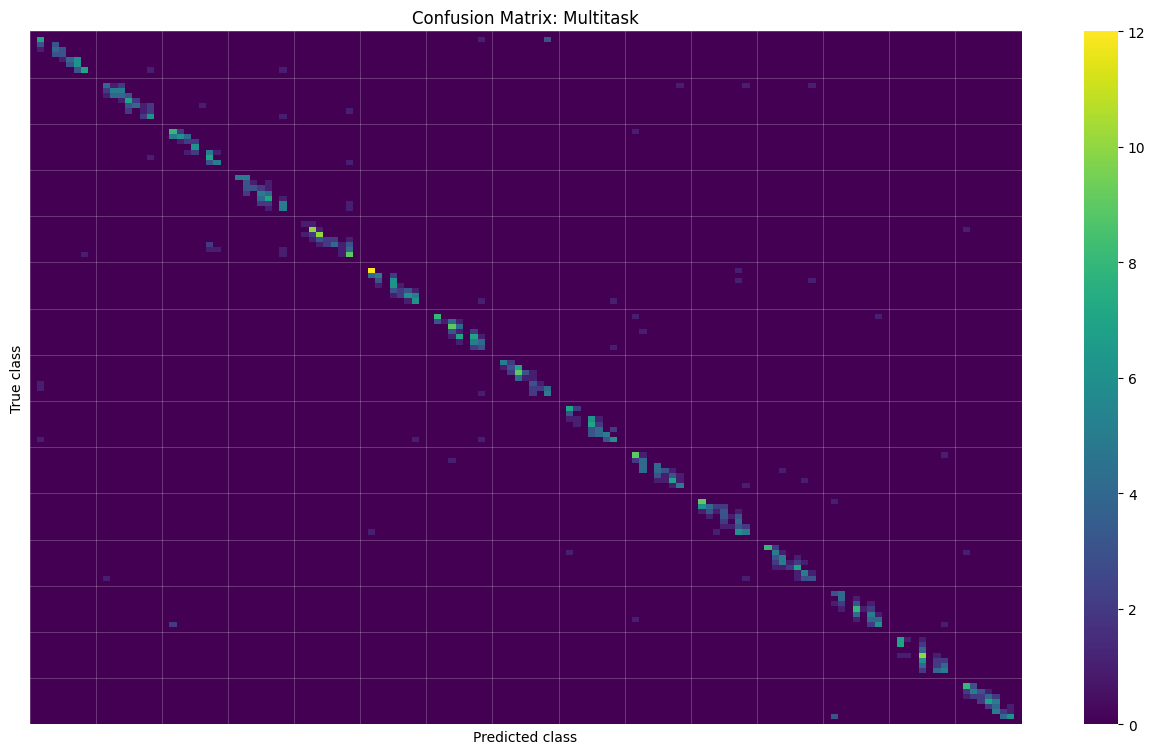

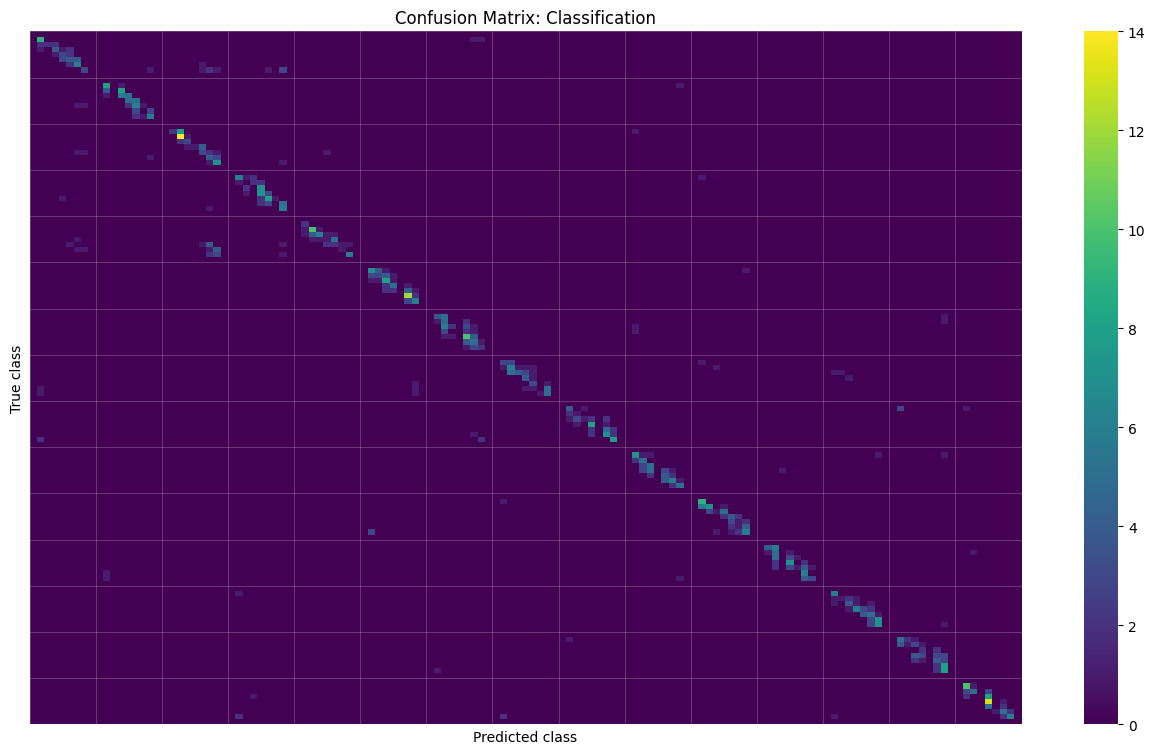

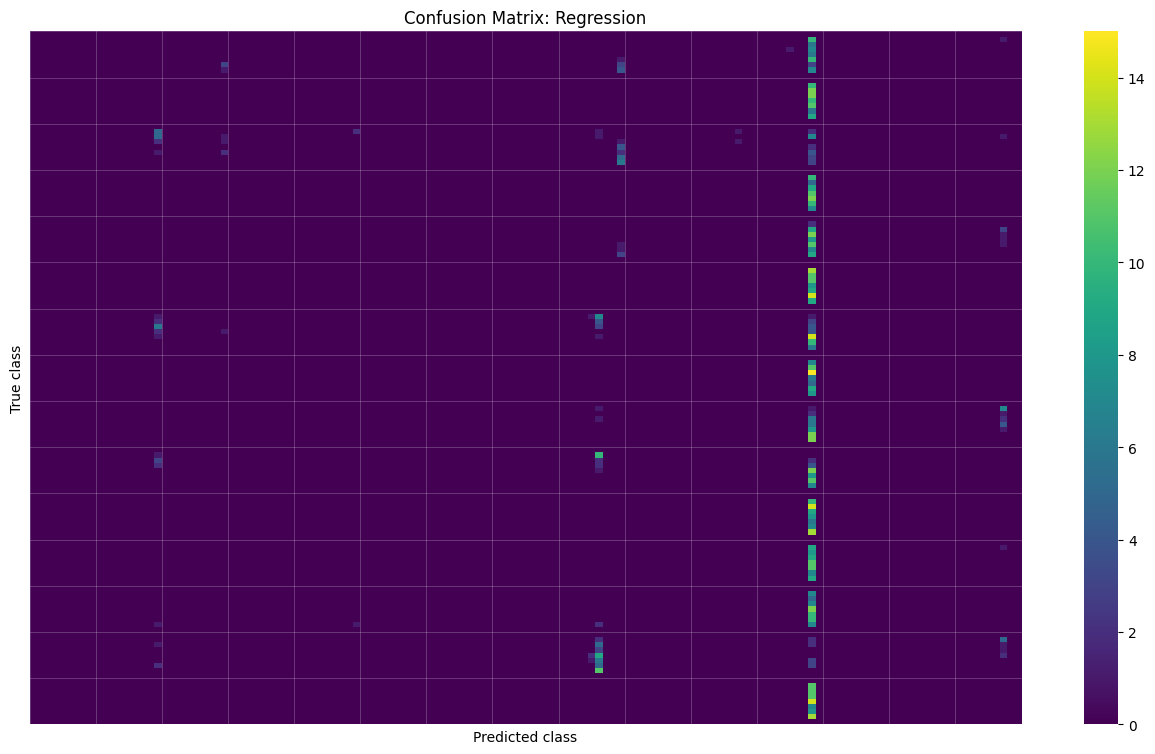

In [ ]:
# loading models
multitask_model = load_model("model_multitask.pth")
classification_model = load_model("model_classification.pth")
regression_model = load_model("model_regression.pth")

# plotting confusion matrices
plot_confusion_matrix(multitask_model, validation_dataloader, device, mode="Multitask")
plot_confusion_matrix(classification_model, validation_dataloader, device, mode="Classification")
plot_confusion_matrix(regression_model, validation_dataloader, device, mode="Regression")